In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Data files are stored in
DATA_DIR_RED = "Data/Red_20x5_25%/"

if not os.path.exists(DATA_DIR_RED):
    os.makedirs(DATA_DIR_RED)

In [62]:
Operando_red_path = f'{DATA_DIR_RED}Spectra_Operando.txt'
Electric_red_path = f'{DATA_DIR_RED}V_A_3_cycles.txt'

class DataAnalysis:
    def __init__(self, path):
        if path[-5] == 'o':
            with open(path, 'r') as file:
                self.dict = {}
                self.dict['time'] = []
                self.dict['wave'] = []
                self.dict['counts'] = []
                for row in file:
                    if row[0].isspace():
                        wave = row.split('\t')[1:]
                        wave = [float(wavenumber) for wavenumber in wave]
                        self.dict['wave']=wave
                    if row[0].isnumeric():
                        rowi = row.split('\t')
                        self.dict['time'].append(float(rowi[0]))
                        counts = [float(count) for count in rowi[1:]]
                        self.dict['counts'].append(counts)
        if path[-5] == 's':
            with open(path, 'r') as file:
                self.dict = {}
                self.dict['time'] = []
                self.dict['volt'] = []
                self.dict['current'] = []
                for row in file:
                    if row[0].isnumeric():
                        #rowi = row.replace('\n','').split('\t')
                        rowi = row.split('\t')
                        self.dict['time'].append(float(rowi[0]))
                        self.dict['volt'].append(float(rowi[1]))
                        self.dict['current'].append(float(rowi[2]))

    def get_time(self):
        return np.array(self.dict['time'])
    
    def get_wave(self):
        return np.array(self.dict['wave'])
    
    def get_counts(self):
        return np.array(self.dict['counts'])
    
    def get_volt(self):
        return np.array(self.dict['volt'])
    
    def get_current(self):
        return np.array(self.dict['current'])

Operando_red = DataAnalysis(Operando_red_path)
Electric_red = DataAnalysis(Electric_red_path)

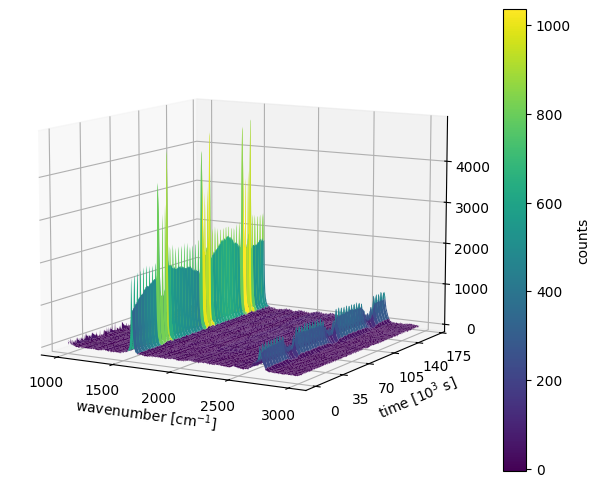

In [63]:
start = 0
fin = -1
t = Operando_red.get_time()/1000
nu = Operando_red.get_wave()[start:fin]
nu_grid, t_grid = np.meshgrid(nu, t)
counts_grid = np.array(Operando_red.get_counts())[:, start:fin]
xticks = np.arange(1000, 3500, 500)
yticks = np.arange(0, 210, 35)
fig = plt.figure(figsize=(8,6))
#plt.contourf(t_grid, nu_grid, counts_grid, cmap='inferno', levels=100)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(nu_grid, t_grid, counts_grid, cmap='viridis')
fig.colorbar(surf, label='counts')
ax.view_init(elev=10, azim=-60)
plt.xlabel(r'wavenumber [cm$^{-1}$]', fontsize=10)
plt.ylabel(r'time [$10^3$ s]', fontsize=10)
plt.xticks(xticks)
plt.yticks(yticks)
plt.show()

In [76]:
lim_ind = 1000
splt_ind = 400
move_split1 = 350
move_split2 = 120
start_ind = 240
end_ind = -120
current = Electric_red.get_current()[:-lim_ind]
voltage = Electric_red.get_volt()[:-lim_ind]
min_ind = np.array([np.argmin(np.abs(current)[400:4000])+400, np.argmin(np.abs(current)[7000:15000])+7000, np.argmin(np.abs(current)[20000:30000])+20000])

time = Electric_red.get_time()[:-lim_ind]
time_charged = np.array([time[min_ind[0]], time[min_ind[1]], time[min_ind[2]]])

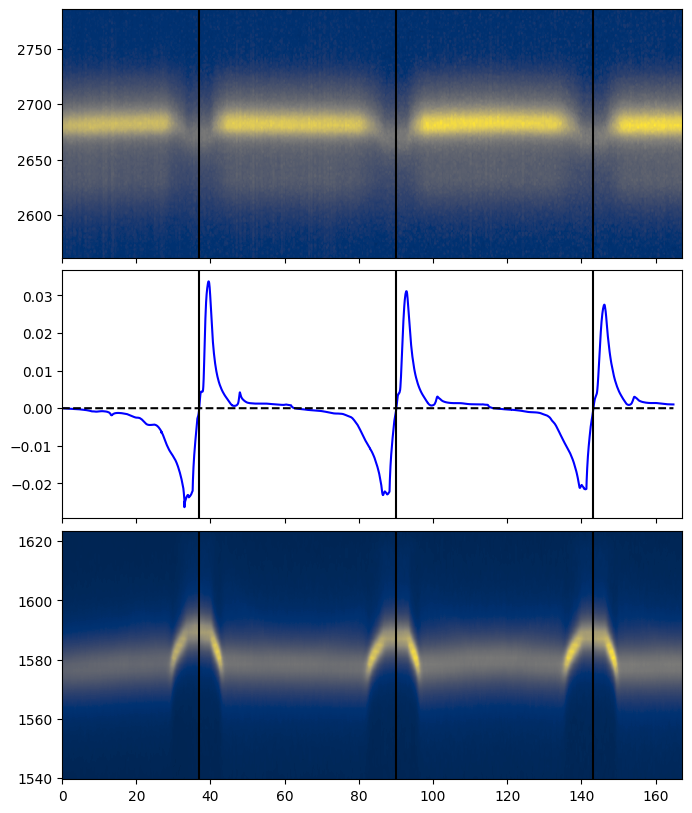

In [77]:

fig, ax = plt.subplots(3, 1, figsize=(8,10), sharex=True)
ax[0].contourf(t_grid[:, splt_ind+move_split1:end_ind], nu_grid[:, splt_ind+move_split1:end_ind], counts_grid[:, splt_ind+move_split1:end_ind], cmap='cividis', levels=200)
ax[2].contourf(t_grid[:, start_ind:splt_ind-move_split2], nu_grid[:, start_ind:splt_ind-move_split2], counts_grid[:, start_ind:splt_ind-move_split2], cmap='cividis', levels=200)
ax[1].plot(time/1000, current, color='blue')
ax[1].plot(time/1000, [0]*len(time), color='black', linestyle='--')
#ax[0].plot(time/1000, voltage, color='green')
#ax[0].plot(time/1000, [0]*len(time), color='black', linestyle='--')
ylabels = [r'2D-band [cm$^{-1}$]', r'Current [mA]', r'G-band []']
for i in range(3):
    for j in range(3):
        ax[i].axvline(time_charged[j]/1000, color='black')
plt.subplots_adjust(hspace=0.05)
plt.show()

In [23]:
TwoD_position_path = f'{DATA_DIR_RED}2D_position_bkg_corrected.txt'
TwoD_height_path = f'{DATA_DIR_RED}2D_height_bkg_corrected.txt'
G_position_path = f'{DATA_DIR_RED}G_position_bkg_corrected.txt'
G_height_path = f'{DATA_DIR_RED}G_height_bkg_corrected.txt'

class Cursor:
    def __init__(self, positionpath, heightpath):
        self.dict = {}
        self.dict['time'] = []
        self.dict['position'] = []
        self.dict['height'] = []
        with open(positionpath, 'r') as file:
            for row in file:
                if row[0].isnumeric():
                    rowi = row.split('\t')
                    self.dict['time'].append(float(rowi[0]))
                    self.dict['position'].append(float(rowi[1]))
        with open(heightpath, 'r') as file:
            for row in file:
                if row[0].isnumeric():
                    rowi = row.split('\t')
                    self.dict['height'].append(float(rowi[1]))
    
    def get_time(self):
        return np.array(self.dict['time'])
    
    def get_position(self):
        return np.array(self.dict['position'])
    
    def get_height(self):
        return np.array(self.dict['height'])

TwoD_cursor = Cursor(TwoD_position_path, TwoD_height_path)
G_cursor = Cursor(G_position_path, G_height_path)

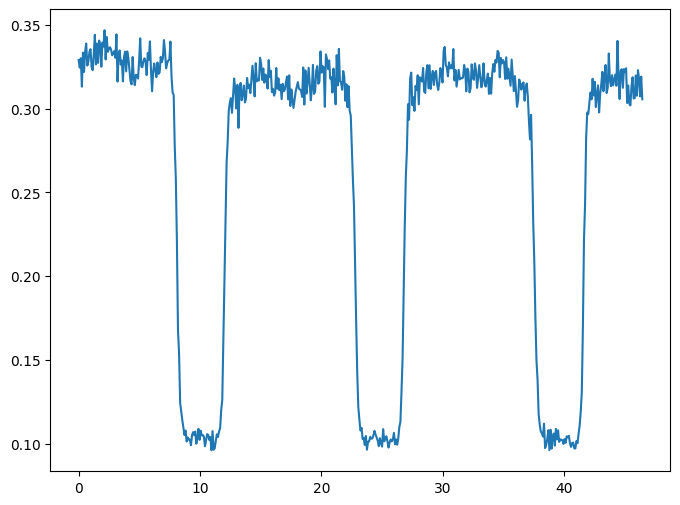

In [58]:
time = G_cursor.get_time()/3600
G_height = G_cursor.get_height()
TwoD_height = TwoD_cursor.get_height()

plt.figure(figsize=(8,6))
plt.plot(time, TwoD_height/G_height)
plt.show()

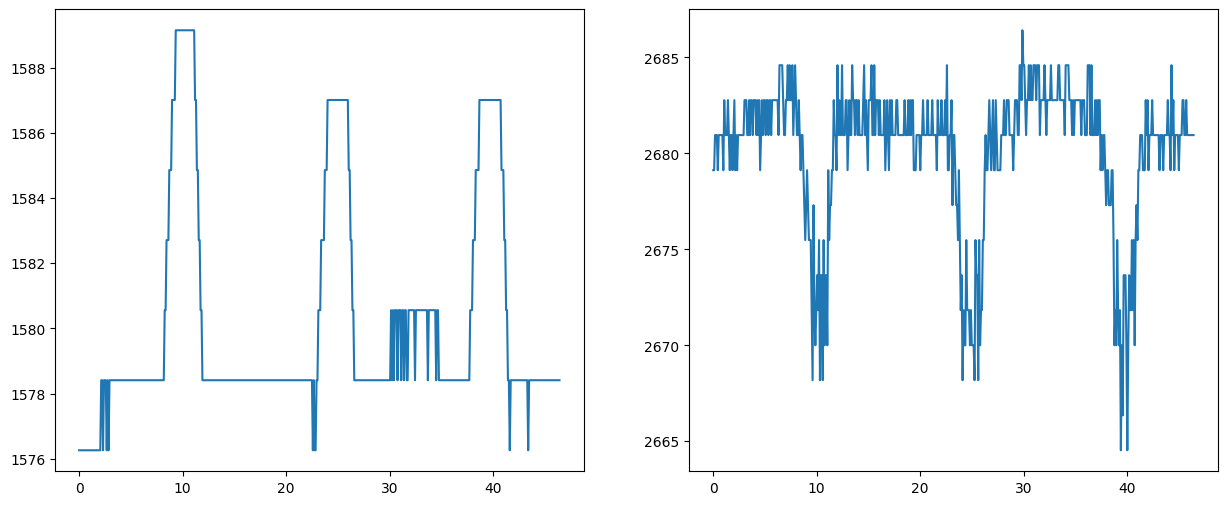

In [60]:
G_position = G_cursor.get_position()
TwoD_position = TwoD_cursor.get_position()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(time, G_position)
ax2.plot(time, TwoD_position)
plt.show()